# American Medical Costs and Lifestyle: EDA and Analysis
# By Michael Ogden #89534952

## Step 1: Data Wrangling

First we must load in the data set and clean it up for use in this analysis by removing NULL values, removing unused columns and adding a BMI_Class column based on the BMI value column. We then assign this new data set to a dataframe 'df'.

We do this using the load_and_process() function within the project_functions.py file that can be found in the scripts folder.

In [1]:
from scripts import project_functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=project_functions.load_and_process(r"C:/Users/Mike/Documents/GitHub/course-project-solo_114/data/raw/Medical_Cost.csv")

## Step 2: Exploratory Data Analysis

Next we must do a surface level analysis of the data to better understand it before answering our research questions.

First by using '.describe' on the wrangled dataset I got general information on the quantitative data and by excluding numbers I got data on the qualitative data, such as:

- Total Entries: 1338
- Max/Min Age = 18/64
- Max/Min BMI = 53.13/15.96
- Max/Min Children = 0/5
- Max/Min Charges = 1121.87/63770.43
- Average BMI is relatively low (30.66)
- Average Children is low (1.09)

By using .values_count() on the Smoker column I found that 1064 were not smokers while 274 were smokers



In [2]:
project_functions.describeDf(df)

Quantitative Data:
               Age          BMI     Children       Charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Qualitative Data:
       Smoker     Region BMI_Class
count    1338       1338      1338
unique      2          4         4
top        no  southeast     Obese
freq     1064        364       614


Smoker/Non-Smoker Count:
no     1064
yes     274
Name: Smoker, dtype: int64


Next I wanted to see how the attributes Age, Children, BMI and Smoker relate to changes in Charges, so for the quantitative attributes I used a `line plot` and for the qualitative Smoker attribute I just put the Smoker's and Non-Smoker's charges on a `violin plot`.

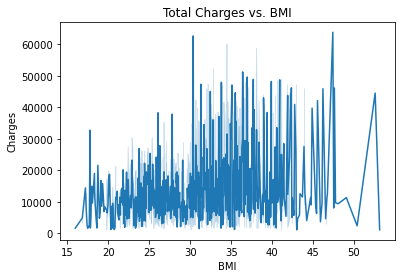

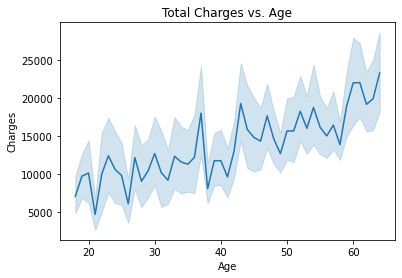

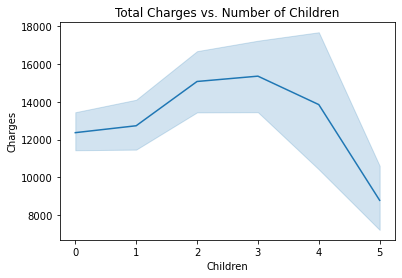

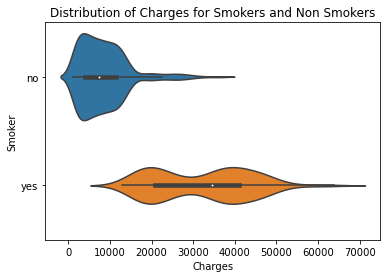

In [3]:
project_functions.EDAplots(df)

These plots show that BMI has little correlation with Charges, although does slightly follow an x/y slope. Age increases Charges at a reasonable and expected rate. Interestingly Number of Children actually forms a parabola, where charges decrease on average after three children, but the variation of amounts also means it is not a deciding factor. Finally Smoking shows an expected but still prominent correlation between higher charges and smoking, which is our focus of this analysis.

## Step 3: Analysis

###  Research Question 1: What is the determining factor in medical costs? (Between Age, BMI, number of Children and whether or not the individual smokes)

Now my first impression based on my EDA was that Smoking was strongly the main factor in medical costs, based on the violin chart of smoker's and non-smoker's charges:

Average Smoker Charges:
32050.23183153285
Average Non-Smoker Charges:
8434.268297856204


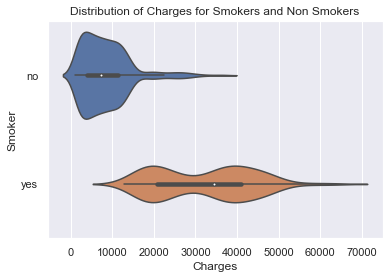

In [4]:
project_functions.smokerVPlot(df)

Here you can see that the grouping for non-smokers is not only much lower, but much tighter meaning there are fewer outliers that have incredibly high or low medical costs. Meanwhile the smoker's grouping is much higher and significantly more spread out, from below $$10000$ to above $$70000$. This is demonstrated in the two averages, which we calculated using the Pandas function '.mean()' on the Charges column of two Non-Smoker and Smokers data frames. Non-smokers average $$8434.27$ while smokers average nearly four times as much with $$32050.23$.

Now we could draw our conclusion solely from this as it is a significant difference, but it would reveal more if we looked at the other factors in a more comparable form.  We will be choosing to ignore Number of Children, as based on the EDA it seems medical costs don't significantly change alongside it and costs actually go against the trend once Number of Children rises above 3. 

Smoking is defined with binary value, while age and BMI are quantitative. Since smoking is such a drastic health influence compared to just being a few years older or a few indexes higher in your BMI, we should divide these two attributes into groups for better comparison. We divide age into two groups based on the median age value of the data set (41 years old) and plot the age groups against medical costs on a box plot overlain with a strip plot as well as BMI clases against medical costs


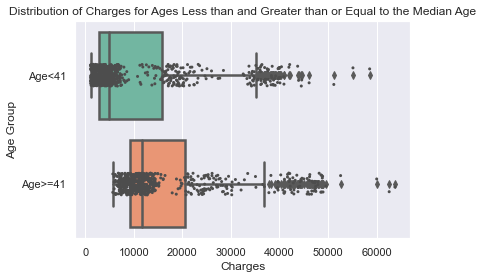

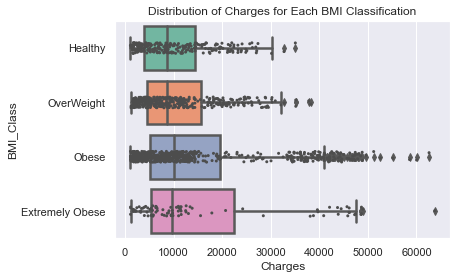

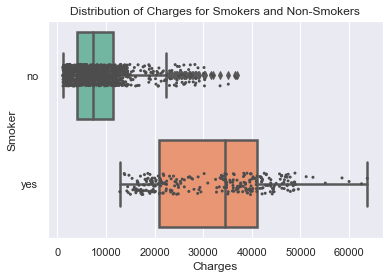

In [5]:
project_functions.boxPlotAge(df)
project_functions.boxPlotBMIClass(df)
project_functions.boxPlotSmoker(df)

These BMI plots shine light on why there was so little trend in the BMI Line Plot, as the distributions are not only all over the place, but get even more scattered as the BMI increases. Because this scatter goes in either direction, the average charges remains very similar across all classes. Therefore we could conclude that BMI is a major factor in more varying health care charges, but not specifically in higher health care charges

Meanwhile, the two age groups show a noticeable difference in average health care charges while maintaining nearly the exact same distribution between the age groups. This demonstrates that age is a factor in health care charges.

One last interesting note from these plots is the difference in distribution on the Smokers and Non-Smokers Charges box plot. The strip plot accentuates how it is not just the difference in average cost that makes smoking such a significant factor, but also how Smokers charges vary so much more than non-Smokers

To prove that Smoking is the most significant factor in amount charged by healthcare providers, we should identify how smoking distinguishes its influence within the second factor we have identified, different age groups. We can do this by plotting the same box plot of Smokers and Non-Smokers Charges, while creating one for each age group. If there is still the same trend of a significantly higher average and wider spread in both age groups, then smoking takes precedence over age in its influence on healthcare costs.

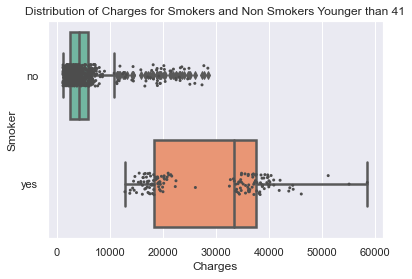

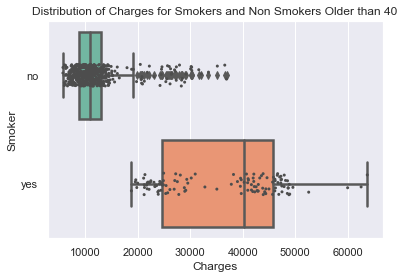

In [6]:
project_functions.boxPlotSmokerAge(df)

Now these two plots look nearly identical, but we must take notice of the x axis. The Younger Group Plot scales from 0 to 6000 while the Older Group Plot scales from 500 to 6500. So there is a difference in averages of around 500 dollars. This constitutes the difference in healthcare costs between the age groups as demonstrated before.

The fact that the distribution and difference of averages follows the same trend between both the age groups and with the overall dataset, this proves that smoking is a more significant influence on healthcare costs than age.

Finally to demonstrate just how much smoking contributes to healthcare costs, we will plot the total costs on a pie chart between smoking and non-smoking contributors.

<Figure size 432x288 with 0 Axes>

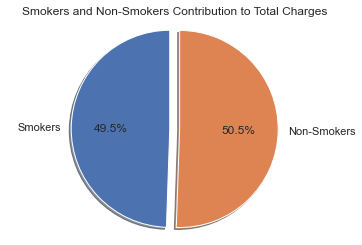

In [7]:
project_functions.pieChartSmoker(df)

Now if we look back to the distribution of Smokers and Non-Smokers in this dataset that we found in our EDA, we see that only 274 of 1338 entries were Smokers. This means that only **20.5%** of the dataset accounts for **49.5%** of the total sum charges.

This sufficiently proves that out of the four attributes, BMI, Age, Number of Children and whether or not someone smokes, smoking has the most significant influence on raising healthcare costs.

### Research Question 2: What effect does smoking and age have on Body Mass Index? Are either the deciding factor in an individuals BMI?

#### Smoking:

To identify this relation we will plot the total number of smokers and non-smokers present in each BMI class. If smoking constitutes larger portions of the class as the BMI rises, it will show that smoking causes higher BMI.

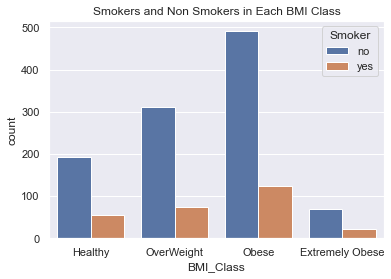

In [8]:
project_functions.barSmokerBMI(df)

Instead we see the portion of each class that are smokers going down as BMI rises, until it spikes again at Extremely Obese. This demonstrates that smoking actually trends with lower BMIs until you reach the highest class, where it constitutes a larger but not majority chunk.

#### Age:

Next we will look at how each class changes with age by plotting the number of people in each class within four different age groups.

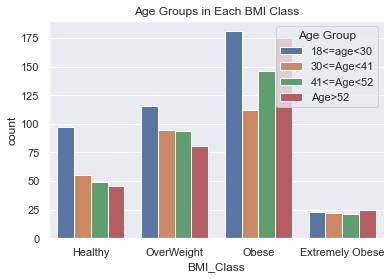

In [9]:
project_functions.barAgeBMI(df)

We split the ages into four roughly even groups to see if any of them make up a significant chunk of each BMI class. The youngest age group  is noticeably higher in all BMI classes except Extremely Obese, but this can likely be attributed to having a larger amount of young people in this sample. Aside from this spike in the youngest group, all four are quite even except for a spike in the oldest group in Obese. This is expected as people become less able to be active as they get older, but won't cause the oldest group to be higher in Extreme Obesity  since they don't change their lifestyle enough to cause Extreme Obesity. Another reason may be that people with Extreme Obesity have shorter life spans on average.

These two factors don't demonstrate any strong correlation between themselves and how high of a Body Mass Index someone has, leading to the conclusion that it is a mixture of other life decisions, such as diet or exercise, and genetics that constitutes an individual